<a href="https://colab.research.google.com/github/nicholasrichers/regressao-neuron/blob/master/pt2_Regressao_na_Pratica_Bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install mlxtend==0.17.3
!pip install pycaret==2.0
!pip install h2o

# Regressão na prática

O que iremos abordar:

- Quando aplicar? 
- Diferencas entre técnicas de regressão e classificação
- Introdução a técnicas de regressão
- Como Avaliar modelos de regressão
- Como selecionamos e comparamos os modelos na prática com auto-ml






---



---



## Conjunto de dados

Nesse treinamento vamos usar um dataset muito conhecido na literatura, chamado [boston housing](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html), que usa **dados demograficos/socioeconômicos** da região para **prever a mediana dos preços das casas** em cada região da cidade.



-CRIM — Taxa de **crime** per capita por cidade

-ZN — **Proporção de lotes** residenciais num raio de 25,000 pés quadrados

-INDUS — **Proporção de acres** para negócios que não são varejo por cidade

-CHAS — **Proximidade com o rio** (1 se o lote está na margem  do rio, 0 se não)

-NOX — **Concentração** de **óxidos** nítricos (partes por 10 milhões)

-RM — Numero médio de **quartos** por residência

-AGE — Proporção de **unidades construídas** antes de **1940**

-DIS — **Distância** ponderada dos cinco grandes **centros** de trabalho

-RAD — Índice de **acessibilidade** à estradas radiais

-TAX — Razão de **imposto** sobre valor total da propriedade

-PTRATIO — Razão de **alunos por professor** na cidade

-LSTAT — % porcentagem de **status inferior** da população

-MEDV — **Valor mediano das casas** ocupadas em milhares


In [2]:
#impotando a biblioteca pandas
import pandas as pd

In [3]:
#url onde o dataset está armazenado
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"

#importando o dataset para o pandas
df = pd.read_csv(url)

#dimensão do dataset
print("O dataset possui {} linhas (registros) e {} colunas (features)".format(df.shape[0], df.shape[1]))

O dataset possui 506 linhas (registros) e 14 colunas (features)


> **Uma amostra do dataset**

In [4]:
df.head(10) 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


> **Estatistica descritiva dos atributos**

In [5]:
 df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000




---



---



## Analisando o conjunto de dados

In [6]:
#Importando Bibliotecas 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


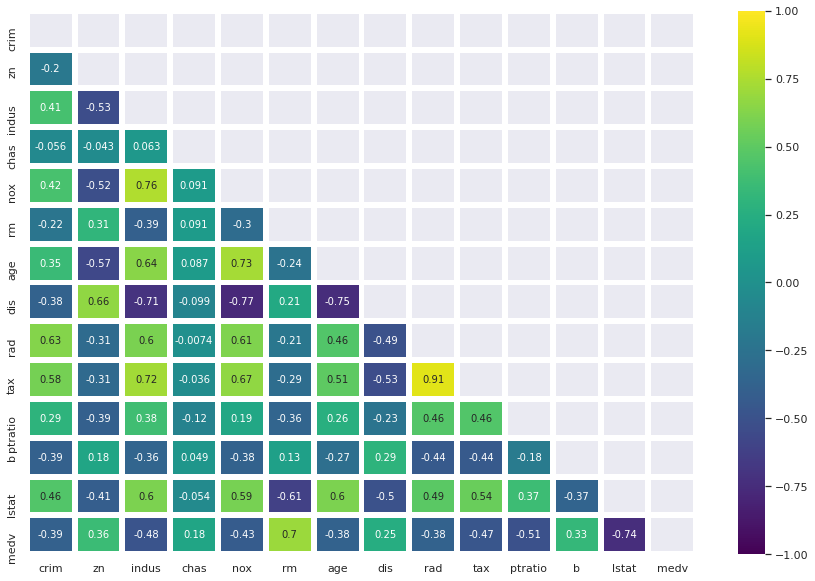

In [7]:
# Aqui estamos calculando a matriz de correlação
corr=df.corr(method='pearson') # É possivel definir o método 

# Desenvolvendo o gráfico de correlação 
np.triu ( np.ones ( corr.shape , dtype  =  bool ))
mask  =  np.triu ( np.ones ( corr.shape , dtype  =  bool ))
fig = plt.gcf() 
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 2.5)
sns.set(font_scale=1)
sns.heatmap(corr, annot=True, mask  =  mask , annot_kws={"size": 10} ,cmap="viridis",linewidths=5, vmin=-1, vmax=1)



---



---



# Dividindo o conjunto de dados 


> **Train/Test Split** 

Após a peparação e compreensão do conjunto de dados, entramos na primeira parte da análise propiamente dita, onde é realizada a divisão do conjunto de dados em treino e teste.

A etapa de **treino** consiste na **apresentação dos padrões** dos dados ao algoritmo, é nesta etapa que este vai tentar aprender. A proxima etapa é a de **teste**, esta objetiva **avaliar** se realmente o algoritmo **aprendeu** os padrões e com isso é possivel identificar a presença de overfitting ou underfitting.

In [8]:
# Vetor de resposta
Y = df['medv']

# Vetor característica
X = df['rm']

Aqui ocorreu a divisão do conjunto de dados, onde **70%** dos dados foram destinados ao **treino** e **30% ao teste**.

In [9]:
from sklearn.model_selection import train_test_split

# Dividindo o banco de dados em treino e teste
treino_Y, teste_Y, treino_X, teste_X = train_test_split(Y, X, test_size = 0.30)

In [10]:
#Aqui verificamos os tamanhos dos bancos de dados de treino e teste
print('Tamanho do banco de dados de treino de Y:', treino_Y.shape)
print('Tamanho do banco de dados de teste de Y:', teste_Y.shape)
print('Tamanho do banco de dados de treino de X:', treino_X.shape)
print('Tamanho do banco de dados de teste de X:', teste_X.shape)

Tamanho do banco de dados de treino de Y: (354,)
Tamanho do banco de dados de teste de Y: (152,)
Tamanho do banco de dados de treino de X: (354,)
Tamanho do banco de dados de teste de X: (152,)




---



---



# Tipos de regressão

### Linear simples
A **regressão linear simples** é uma abordagem para prever uma resposta usando uma única feature. Entende-se que as duas variáveis ​​estão **linearmente relacionadas**. Com base nisso, tentamos encontrar uma **função linear** para prever o valor do alvo (Y) com a maior precisão possível a partir de uma função com a variável independente (X).

> **Regressão linear na mão** (*from scratch*)


Estimando Coeficientes :
b_0 = -34.21177680052355  \ 
b_1 = 9.054363678771972


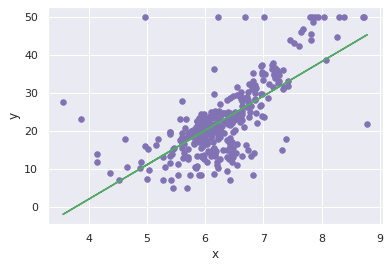

In [11]:
#Adaptado de https://www.geeksforgeeks.org/linear-regression-python-implementation/

def estimate_coef(x, y): 
  # número de observações
   n = np.size(x) 
  # calculando a média dos vetores x e y
   m_x, m_y = np.mean(x), np.mean(y)
  # calculando a soma dos produtos cruzados dos desvios e o devio sobre X
   SS_xy = np.sum(y*x) - n*m_y*m_x 
   SS_xx = np.sum(x*x) - n*m_x*m_x
  
  # obtendo os coeficientes da regressão 
   b_1 = SS_xy / SS_xx 
   b_0 = m_y - b_1*m_x 
   
   return(b_0, b_1)

def plot_regression_line(x, y, b): 
    # Plotando o gráfico  
    plt.scatter(x, y, color = "m", marker = "o", s = 30)
    y_pred = b[0] + b[1]*x

    plt.plot(x, y_pred, color = "g")
    plt.xlabel('x') 
    plt.ylabel('y') 
    plt.show()

def main(): 
    # Chamando dados  
    x = np.array(treino_X) 
    y = np.array(treino_Y) 
  
    # Imprimindo coeficientes 
    b = estimate_coef(x, y) 
    print("Estimando Coeficientes :\nb_0 = {}  \ \nb_1 = {}".format(b[0], b[1]))

   #Plotando predições geradas 
    plot_regression_line(x, y, b) 

if __name__ == "__main__": 
    main() 



---



---



> **Usando** [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [12]:
#Adaptado de https://scikit-learn.org/stable/

#Chamando pacotes 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Transformando Dataframes em array
treino_X = np.array(treino_X)
treino_Y = np.array(treino_Y)
teste_X = np.array(teste_X)
teste_Y = np.array(teste_Y)

regr_simples = LinearRegression()

#ajustando o modelo
regr_simples.fit(treino_X.reshape(-1, 1), treino_Y.reshape(-1, 1)) #O reshape só é necessário em array 1-D

#criando as predicoes
preds_regr_simples = regr_simples.predict(teste_X.reshape(-1, 1))

#imprimindo os coeficientes
print("Intercept: \n", regr_simples.intercept_)
print('Coefficients: \n', regr_simples.coef_)

#imprimindo as métricas
print('RMSE: %.2f'% mean_squared_error(teste_Y, preds_regr_simples))
print('R2: %.2f'% r2_score(teste_Y, preds_regr_simples))

Intercept: 
 [-34.2117768]
Coefficients: 
 [[9.05436368]]
RMSE: 41.10
R2: 0.48


> **Plotando o nosso modelo**


Caso queira aprender mais sobre matplotlib, temos um [treinamento](https://github.com/nicholasrichers/dataviz-neuron/blob/master/Treinamento_Dataviz.ipynb) específico para essa biblioteca

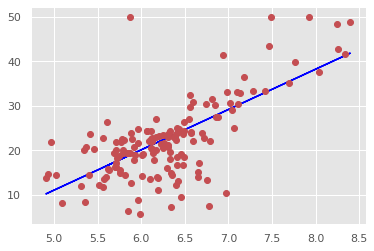

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Plotando Predições do modelo regr_simples 
plt.plot(teste_X, preds_regr_simples, color="blue")

#Amotras de teste (vermelho)
plt.plot(teste_X, teste_Y, 'ro')


plt.show()



---



---



### Regressão Múltipla

A regressão múltipla  envolve **duas ou mais variáveis** independentes, tal caracteristica representa a principal diferença entre este modelo e a regressão simples. A adição destas variáveis independentes tende a  **melhorar** a capacidade de **predição** em relação a regressão linear simples. Existem algumas maneiras diferentes para **estimarmos os coeficientes** e falaremos de duas delas.


In [14]:
#Usaremos o mesmo target
Y = df['medv']

#Nossa matriz de features usará todas as colunas do dataframe exceto o target
X = df.iloc[:, :-1]

#refazendo o split
y_train, y_test, X_train, X_test = train_test_split(Y, X, test_size = 0.30)



---



---



> **Método dos Mínimos Quadrados (Ordinary Least Squares - OLS)**


Descrição:

Esse procedimento busca minimizar a soma do quadrados dos resíduios e dessa forma estimar uma solução única para o vetor de parâmetros ($b$). Partindo do nosso problema original temos que:

>$y=X.b$ (1)

Onde $X$ é a nossa matriz de features, $y$ é o preço estimado das casas e $b$, o vetor de coefientes que precisamos estimar. Extendendo a eq. (1), temos que:

> $X^{T} . y = X^{T}. X.b $ (2)

Onde bastou multiplicartmos ambos os lados por $X^{T}$. Em seguida desenvolvendo a eq. (2) algebricamente e isolando $b$, temos:


> $b = (X^{T} . X)^{-1} . X^{T} . y$ (3)


Note que $(X^{T} . X)^{-1} . X^{T}$, é conhecida como a [pseudo-inversa](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) de $X$.

Finalmente, usaremos a eq. (3) para estimar nosso vetor $b$, onde:


```
np.linalg.inv(X_train.T.dot(X_train))
```
Representa $(X^{T} . X)^{-1} $


In [15]:
#Determinando b pelo método OLS, manualmente
b = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train) #(eq.3)

#Coeficientes
print("Coeficientes: {}".format(b))

#Gerando as predições
preds_ols = X_test.dot(b)

Coeficientes: [ 0.02131528  0.04756326 -0.01970029  3.82047782 -0.90717816  5.4188369
 -0.00991104 -0.93857813  0.22024385 -0.01148489 -0.34889213  0.02154767
 -0.47205773]




---



---



> **Usando skelarn**

A função [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), também usa o método OLS.

In [16]:
#Adaptado de https://scikit-learn.org/stable/

# Mesmo exemplo de uma variável usando sklearn
#criando o nosso modelo como todos os parametros "Default"
reg_ols = LinearRegression()

#treinando o model
reg_ols.fit(X_train, y_train)

#Coeficientes
print("Coeficientes: {}".format(reg_ols.coef_))
print("Intercept: {}".format(reg_ols.intercept_))


#salvando nossas predicoes
preds_ols_sklearn = reg_ols.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_ols.score(X_test, y_test)))


Coeficientes: [-2.95993443e-02  4.43872532e-02  2.75693597e-02  3.55023618e+00
 -1.84813071e+01  3.44020784e+00  3.62067614e-05 -1.44704097e+00
  3.65678266e-01 -1.43471708e-02 -9.21818255e-01  1.28680910e-02
 -5.71539435e-01]
Intercept: 37.9193953532195
R2: 0.768839040603642


Regressão Simples (RM): **R2: 0.59**



---



---



> **Método de Descida Gradiente (Gradient Descent)**

Dada uma função definida na regressão definida com base em um conjunto de parâmetros, a descida do gradiente começa com um conjunto inicial de valores de parâmetro e se move iterativamente em direção a um conjunto de valores de parâmetro que minimizam a função



$⟨∂∂b(RSS),∂∂m(RSS)⟩=⟨−2∑_{i=1}^{n}(y_{i} − (m x_{i} + b)),−2∑_{i=1}^{n}xi(y_{i}−(m x_{i} + b))⟩$



![picture](https://miro.medium.com/max/379/0*-j3BGxc-EJDOddim)

> **Stochastic Gradient Descent**

Como a regressão linear é feita usando o método OLS, aqui vamos usar o [SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor), que também implementa o algoritmo de descida gradiente, porém de uma forma um pouco diferente.

Na formulação original, o algoritmo a **função de custo** é estimada usando **todo o conjunto de dados** e então o modelo é atualizado de acordo com a taxa de aprendizado (learning rate). No **gradiente estocástico**, essa **atualização é feita a cada amostra** e então ajustado pela taxa de aprendizado.

In [17]:
#Adaptado de https://scikit-learn.org/stable/
from sklearn.linear_model import SGDRegressor

reg_sgd = SGDRegressor()

#treinando o model
reg_sgd.fit(X_train, y_train)

#Coeficientes
print("Coeficientes: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))


#salvando nossas predicoes
preds_sgd_sklearn = reg_sgd.predict(X_test)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_sgd.score(X_test, y_test)))

Coeficientes: [ 4.59406054e+11  5.01239149e+10 -1.97812997e+11 -2.56104544e+10
 -1.55837426e+10 -3.35685209e+10  1.60701200e+11  4.00301555e+09
  1.09185203e+12  2.66025160e+11  6.73589885e+11  4.35026990e+10
  1.71560045e+11]
Intercept: [-6.65326076e+09]
R2: -3.929515223282281e+26


Perceba que o coeficiente de determinação (R2), foi **terrível**, e foi necessária alguma investigação para entender o motivo...



---



---



Perceba na **distribuição** para cada variável (coluna, na tabela abaixo), que as **variáveis** estão em diferentes **escalas**, algumas entre (0..100), outras entre (180..700). Mesmo essas diferenças não sendo assim tão significativas, moldou a **topologia** do subspaço de maneira **irregular** (imagem abaixo), e fez o nosso **algoritmo divergir**.

![picture](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSzEsJBbkLjWeI4Ll579HHG757cL0jCtvomjg&usqp=CAU)

In [18]:
 df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Para fazer esse ajuste, usamos o [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler) do sklearn. Nesse caso todas as colunas passam a ter média $\mu=0$ e desvio padrao $\sigma=1$, como no gráfico a direita na imagem abaixo.


![picture](https://miro.medium.com/max/1400/1*GAcEj37smCOCZMrqp-rjjA.png)

> Agora vamos treinar novamente o SGDRegressor, com os dados escalonados. Lembre-se que devido a natureza estocástica os resultados variam um pouco a cada tentativa.

In [19]:
#Adaptado de https://scikit-learn.org/stable/
from sklearn.preprocessing import StandardScaler
std = StandardScaler() # Padronizando dados


X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.fit_transform(X_test)

#treinando o model
reg_sgd.fit(std.fit_transform(X_train_scaled), y_train)

#Coeficientes
print("Coeficiente: {}".format(reg_sgd.coef_))
print("Intercept: {}".format(reg_sgd.intercept_))

#salvando nossas predicoes
preds_sdg_scaled = reg_sgd.predict(X_test_scaled)

#Avaliando o modelo (R^2)
print("R2: {}".format(reg_sgd.score(X_test_scaled, y_test)))

Coeficiente: [-0.11547023  0.97602615 -0.06974435  0.9394564  -1.89921516  2.54219521
 -0.09272626 -2.97586511  2.31508506 -1.66508564 -1.8823202   1.11098234
 -4.06280819]
Intercept: [23.04215284]
R2: 0.743092972552897


Regressão OLS: **R2: 0.76**



---



---



Uma segunda razão relacionada a **divergência** do algoritmo pode estar ligada ao tamanho da **taxa de aprendizado**. Caso seja muito grande, pode levar ao problema da imagem abaixo. No caso acima usamos o valor padrão `learning_rate=0.0001`.

![picture](https://i.stack.imgur.com/0tirm.png)

> Obs: Além das duas formulações acima, poderíamos estimar os coeficientes estimando a **máxima verossimilhança**, não cobriremos esse método nesse treinamento, mas há uma excelente fonte inicial [aqui](https://machinelearningmastery.com/linear-regression-with-maximum-likelihood-estimation/). 



---



---



### Métricas de avaliação de modelos de Regressão 



A documentação sklearn possui uma seção dedicada a [métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) de regressão.

$R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$

In [20]:
# R2
from sklearn.metrics import r2_score
y_true = [1, 2, 3]
y_pred = [1, 2, 3]
r2_score(y_true, y_pred)

1.0



---



---



$\text{MSE}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2.$

In [21]:
# MSE
from sklearn.metrics import mean_squared_error
y_true = [[0.5, 1],[-1, 1],[7, -6]]
y_pred = [[0, 2],[-1, 2],[8, -5]]
mean_squared_error(y_true, y_pred)

0.7083333333333334



---



---



$\text{MAE}(y, \hat{y}) = \frac{1}{n_{\text{samples}}} \sum_{i=0}^{n_{\text{samples}}-1} \left| y_i - \hat{y}_i \right|.$

In [22]:
# MAE
from sklearn.metrics import mean_absolute_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_absolute_error(y_true, y_pred)

0.5

> **Sobre o uso das métricas:**


Lembre-se que um **problema** de aprendizado de máquinas é geralmente reduzido a um problema de **otimização** (i.e maximizar ou minimizar uma função). 


Podemos definir a função objetivo como uma função que tem (gradiente) e segunda (hessiana) derivada, enquanto uma métrica não precisa ser diferenciável. **Precisamos que a função objetivo seja diferenciável**, então algoritmos como descida gradiente e até redes neurais (backpropagation) podem ser treinados. 


Das três métricas citadas acima, **apenas o MSE é diferenciável** ​​(existem algumas funções proxy para algumas métricas, como MAE, que podem ser usadas como um objetivo) e **o resto** só pode ser usado como métricas, **para fins de comparação** de modelos.





---



---



> **Intepretação dos modelos (análise dos resíduos)**

O métodos dos **mínimos quadrados** pressupõe que o resíduo $e(t) = y(t) − y_{pred}(t)$ tem **distribuição normal, média nula e variância constante**. Esta hipótese implica implicitamente que **processo é estacionário**, ou seja, que as características estatísticas do processo se mantêm estáveis.

![picture](https://github.com/nicholasrichers/regressao-neuron/blob/master/img/analise_residuos.png?raw=true)

[Fonte](https://ensinandomaquinasblog.wordpress.com/)

Agora vamos observar a distribuição da **densidade** dos erros dos 3 modelos que desenvolvemos até aqui.

In [23]:
#resíduo Regressão simples
resid_simples = preds_regr_simples.ravel() - y_test

#resíduo OLS
resid_ols = preds_ols_sklearn - y_test

#resíduo SGD
resid_sgd = preds_sdg_scaled - y_test


#salvando esses resultdos numa lista iterável
resids = [resid_simples, resid_ols, resid_sgd]

Perceba que a premissa que onde **média dos resíduos é zero**, tende a ser **menos provável** a medida que a **dimensionalidade** do dataset **aumenta**, dessa forma, perceba que o modelo linear simples possui um aspecto mais próximo a normal, mesmo sendo um modelo inferior em relação ao $R^{2}$.

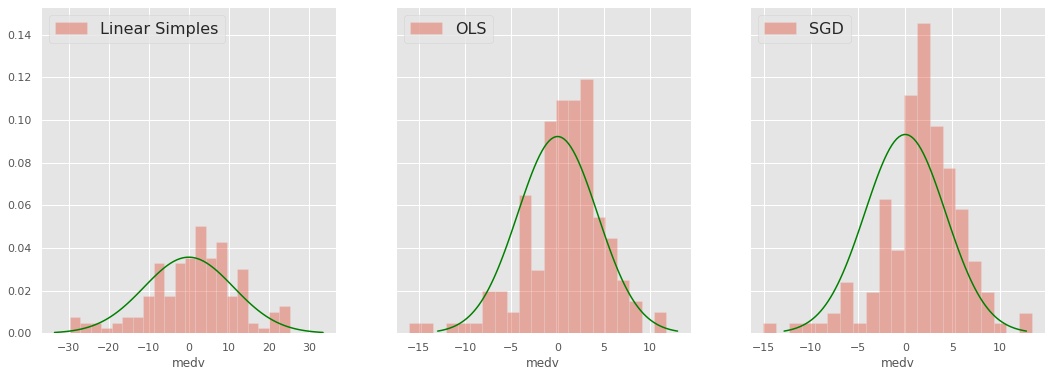

In [24]:
import scipy.stats as stats

legend = ["Linear Simples", "OLS", "SGD"]

#criando a imagem
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(18,6))
for i, res in enumerate(resids):

  #Histograma de densidade
  sns.distplot(res, bins=21, norm_hist=True, kde=False, ax=axes[i])

  #Distribuião normal com média nula e std constante
  mu, sigma = 0, res.std()

  #plotando a normal
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  axes[i].legend([legend[i]], loc = 'upper left', fontsize=16)
  axes[i].plot(x, stats.norm.pdf(x, mu, sigma), color = "green")


plt.show()

> Como melhorar?

- **Transformaçoes** nos dados (MinMax & StandardScaler)
- Busca de **hiperparâmetros**
- Remoção de **Outliers**
- Remoção de variáveis muito **correlacionadas**



---



---



## Regressão Polinomial

Outra presunção forte da regressão linear é considerar uma **relação linear** das variáveis de entrada e saída.

In [25]:
#selecionei 5 colunas para facilitar a visualização
cols = ["rm", "age", "tax" , "lstat", "medv"]

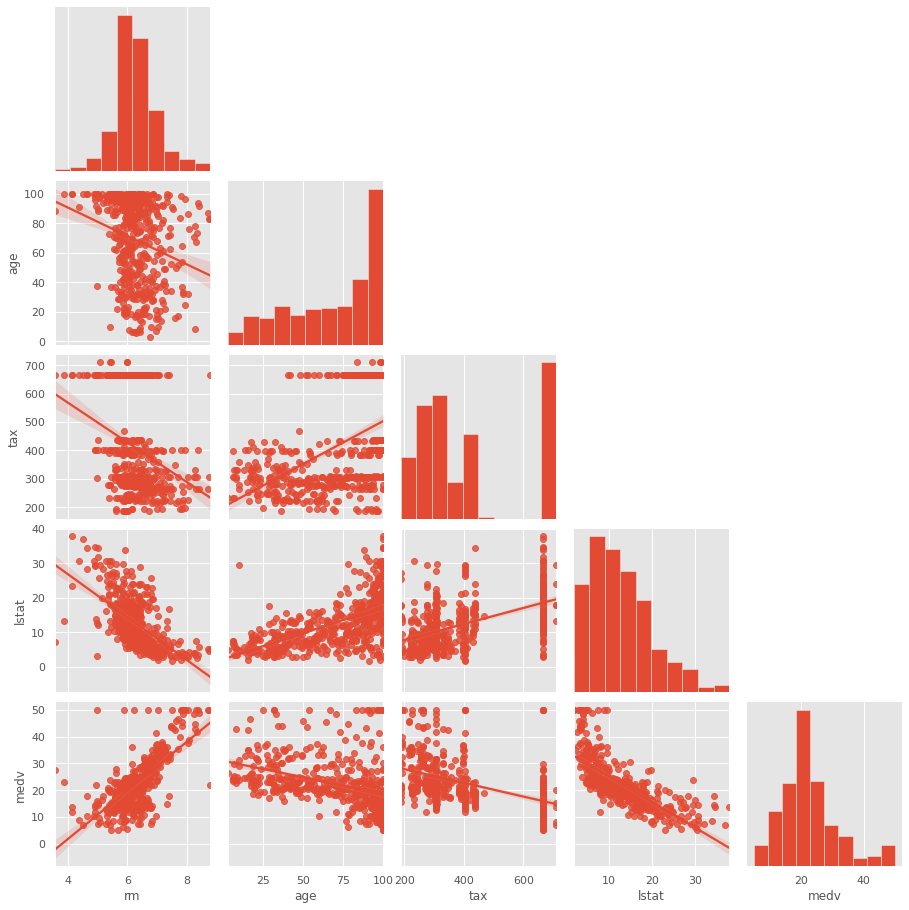

In [26]:
sns.pairplot(df[cols], corner=True, kind="reg") 

Podemos ver na última linha do `pairplot`, que essa hipótese **não é verdadeira para todas as features**, em especial a variável `lstat`. Além disso, é fácil supor que a adição de **mais features** ao modelo torna essa hipótese ainda **mais difícil** de se manter.



---



---



> Observe o relacionamento entre um **par de variáveis**, para **diferentes** **graus**, $y= X^1$; $y= X^3$: $y= X^{20}$.



![picture](https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png)




Obs: Os **modelos** acima ainda são considerados **lineares**, porque os **coeficientes**  associados as features ainda são **lineares**, mesmo que a curva que estamos ajustando for quadrática por natureza.



---



---



> Agora, vamos criar um modelo **polinomial** com a ajuda do [sklearn](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions). Imagine uma matriz ($P$) de features com **duas colunas** ($x_{1}$ e $x_{2}$) de entrada e apenas **3 registros**.

In [27]:
P = np.arange(6).reshape(3, 2)
P

array([[0, 1],
       [2, 3],
       [4, 5]])

As features ($x_{1}$ e $x_{2}$) de $P$, foram **transformadas** para a forma:

($x_{1}$ e $x_{2}$) $->$ ($1, x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}$)

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(P)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Vamos **repetir** esse mesmo **procedimento** para os dados de **treino e teste**, do nosso conjunto de dados de imóveis. Note que criamos uma função para facilitar a repetição do procedimento para diferentes `degrees`.

In [29]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree, get_data=False):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  X_test_poly = poly_features.fit_transform(X_test)

  #return my poly_data
  if get_data==True: return X_train_poly, X_test_poly
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(X_test_poly)

  #salvando nossas predicoes
  preds_sdg_sklearn = reg_sgd.predict(X_test)
    
  # evaluating the model on training dataset
  mse_train = mean_squared_error(y_train, y_train_predicted)
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  mse_test = mean_squared_error(y_test, y_test_predict)
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("MSE of training set is {:.3f}".format(mse_train))
  print("R2 score of training set is {:.3f}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("MSE of test set is {:.3f}".format(mse_test))
  print("R2 score of test set is {:.3f}".format(r2_test))

> `degree=1`: Chegamos a um resultado **similar** ao que criamos anteriormente, percerba que há uma pequena perda de performance, do treino, para o teste, como o esperado.

In [30]:
create_polynomial_regression_model(1)

The model performance for the training set
-------------------------------------------
MSE of training set is 24.032
R2 score of training set is 0.716


The model performance for the test set
-------------------------------------------
MSE of test set is 18.994
R2 score of test set is 0.769


> `degree=2`: Houve um signigicativo **ganho de performance** em relação ao anterior, tanto para o treino, como para o teste. Contudo, perceba que a diferença entre treino e teste aumentou um pouco em relação a `degree=1`.

In [31]:
create_polynomial_regression_model(2)

The model performance for the training set
-------------------------------------------
MSE of training set is 5.101
R2 score of training set is 0.940


The model performance for the test set
-------------------------------------------
MSE of test set is 36.774
R2 score of test set is 0.552


> `degree=3`: As métricas `RMSE=0` e `R2=1`, indicam que o modelo **acertou** o valor de todo o conjunto de **treino**, contudo, teve uma performance **terrível** para o conjunto de **teste**, o que indica que o nosso modelo não conseguiu generalizar o problema e de alguma forma "**decorou**" o conjunto de treino e não consegue acertar no conjunto de teste. Isso significa o mesmo que **overfiting**.

In [32]:
create_polynomial_regression_model(3)

The model performance for the training set
-------------------------------------------
MSE of training set is 0.000
R2 score of training set is 1.000


The model performance for the test set
-------------------------------------------
MSE of test set is 79275.319
R2 score of test set is -963.813




---



---



## Bias & Variancia

Relacionane a **legenda** da primeira imagem com a segunda.

![picture](https://miro.medium.com/max/700/1*zOl_ztYqnzyWRkBffeOsRQ.png)

![picture](https://qph.fs.quoracdn.net/main-qimg-ed02a43e7c32e81171ba5f7eecb06334)

> Como calcular o **Bias e a Variância**

A formula da estimativa do erro em função do viés e da variância pode ser obtida dessa forma.

$(1) Erro(x) = (Y - fhat(x))$

$(2) Erro(x) = E[(Y - fhat(x))^{2}]$

$(3) Erro(x) = E[fhat(x) - f(x)]^{2} + E[fhat(x) - E(fhat(x))^{2}] + \sigma^{2}$

$(4) Erro(x) = Bias^{2} + Variancia + Ruido $

Felizmente, não precisamos realizar esse cálculo manualmente, podemos usar a função [bias_variance_decomp](http://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/) da biblioteca MLxtend.

In [33]:
# estimate the bias and variance for a regression model
from mlxtend.evaluate import bias_variance_decomp
import re

def bias_variance(model, X_train, X_test, y_train, y_test):

  # Nome do modelo
  name = re.findall("^.{0,10}", str(model))[0]

  # estima bias and variance (MLxtend nao aceita pandas dataframe) 
  mse, bias, var = bias_variance_decomp(model, 
                                        X_train, 
                                        y_train, 
                                        X_test, 
                                        y_test, 
                                        loss='mse', 
                                        num_rounds=200, 
                                        random_seed=42)

  
  # summarize results
  print('Model Name: ', name)
  print('MSE: %.3f' % mse)
  print('Bias: %.3f' % bias)
  print('Variance: %.3f' % var)

> `degree=1`: Alto bias e baixa variância.

In [34]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(1, get_data=True)

#modelo que iremos usar
model= LinearRegression()

#calculando o bias e a variância
bias_variance(model, X_train_poly, X_test_poly,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 20.642
Bias: 18.513
Variance: 2.129


> `degree=2`: Diminuiu o bias e aumentou variância.

In [35]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(2, get_data=True)

#calculando o bias e a variância
bias_variance(model, X_train_poly, X_test_poly,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 637.465
Bias: 100.243
Variance: 537.221


> `degree=3`: Bias e variância muito altos.

In [36]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(3, get_data=True)


#calculando o bias e a variância
bias_variance(model, X_train_poly, X_test_poly,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 350904.539
Bias: 36234.499
Variance: 314670.040


Obs: Lembre que os **valores** obtidos acima foram para o conjunto de **dados de teste**.



---



---



## Regularização

A partir do experimento acima podemos perceber que há um **tradeoff** entre o **erro** e a **complexidade** **do modelo**.

> **Bias & Variance Tradeoff**

![picture](https://miro.medium.com/max/492/1*kADA5Q4al9DRLoXck6_6Xw.png)

> Uma maneira eficiente de **controlarmos** a **complexidade** do modelo, e ainda **reduzirmos o Bias**, é através da **regularização**.

Voltando ao exemplo onde:
($x_{1}$ e $x_{2}$) $->$ ($1, x_{1}, x_{2}, x_{1}^{2}, x_{1}x_{2}, x_{2}^{2}$)

Para  o caso onde em $x_{1}$ observássemos um relacionamento **quadrático** com o alvo e em $x_{2}$ um relacionamento **linear**, a melhor função que mapearia os nossos dados seria do tipo ($1, x_{2}, x_{1}^{2}$). Contudo esse tipo de inferência, além de **pouco prática** e propensa a overfiting, incorre em problemas como [data snooping](https://work.caltech.edu/library/173.html). Uma vez que é necessário "bisbilhotar" os dados e passar essa informação direto pro modelo.




---



---



> **Modelos lineares com regularização**


A maneira correta de controlarmos a complexidade do modelo é através da **regularização**, que a grosso modo **penaliza** os **maiores** **coeficientes**. A seção de [modelos lineares](https://scikit-learn.org/stable/modules/linear_model.html#) da documentação do sklearn, é uma excelente fonte para entender o funcionamento dos modelos e obter alguns exemplos.

> Formalizando **regressao linear (OLS)**, temos:

$\min_{w} || X w - y||_2^2$

Onde $w = (w_1, ..., w_p)$, são os nossos **coeficientes**, que minimizam a soma do quadrado dos residuos. 


$|| X w - y||_2$ é a [l2-norm](https://medium.com/@montjoile/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c) do vetor resultante.

ou

$sqrt(|a|^{2} + |b|^{2} + |c|^{2} + ...)$




> Vamos criar uma função para repetirmos esse procedimento para os diversos modelos. Note que a única coisa que precisamos mudar na chamada da função é o próprio modelo.

In [37]:
def train_linear_model(model, X_train, X_test,  y_train, y_test, print_coef=True):

  
  #calculando o bias e a variância
  bias_variance(model, X_train, X_test,  y_train, y_test) 

  #não printar com notação científica
  np.set_printoptions(suppress=True)


  #treinando e avaliando o modelo (R^2)
  model.fit(X_train, y_train)
  print("R2: {:.3f}".format(model.score(X_test, y_test)))
  #print("MSE: {}".format(mean_squared_error(y_test, model.predict(X_test))))

  #Coeficientes
  if print_coef==True:  
    print("---------------------")
    print("Intercept: {:.3f}".format(model.intercept_))
    print("Coeficientes: {}".format(np.round(model.coef_,3)))
    

In [38]:
from sklearn.linear_model import LinearRegression

train_linear_model(LinearRegression(), X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  LinearRegr
MSE: 20.642
Bias: 18.513
Variance: 2.129
R2: 0.769
---------------------
Intercept: 37.919
Coeficientes: [ -0.03    0.044   0.028   3.55  -18.481   3.44    0.     -1.447   0.366
  -0.014  -0.922   0.013  -0.572]




---



---



> **Ridge Regressor**


A componente de **regularização** é uma **extensão** do método OLS. O parâmetro de regularização $\alpha \geq 0$ **controla a penalização**. Quanto maior o valor de $\alpha$, maior a penalização para a complexidade, portanto os coeficientes se tornam mais **robustos à colinearidade**.


>> $\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$

Agora precisamos minimizar $||w||_2^2$, a soma dos valores valores absolutos dos coeficientes ao quadrado.

In [39]:
from sklearn.linear_model import Ridge

train_linear_model(Ridge(), X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  Ridge()
MSE: 20.898
Bias: 18.839
Variance: 2.059
R2: 0.764
---------------------
Intercept: 31.111
Coeficientes: [-0.021  0.046 -0.009  3.398 -9.018  3.505 -0.009 -1.31   0.343 -0.015
 -0.821  0.014 -0.577]


Obs: Perceba que usando o sklearn, a única variável que precisamos alterar é o próprio modelo.



---



---



> **Lasso Regression**

Modifica o modelos OLS, porém utiliza a [l1-Norm](https://medium.com/@montjoile/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c) ou $(|a| + |b| + |c| + ...)$.



>>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$


O modelo Lasso tende a estimar **coeficientes esparsos**, ou sejam com poucos coeficientes diferentes de zero, o que pode ser útil na **presença de variáveis não informativas**.

In [40]:
from sklearn.linear_model import Lasso

train_linear_model(Lasso(),  X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  Lasso()
MSE: 25.094
Bias: 23.896
Variance: 1.199
R2: 0.704
---------------------
Intercept: 40.187
Coeficientes: [-0.     0.047 -0.     0.    -0.     0.842  0.015 -0.663  0.327 -0.018
 -0.66   0.012 -0.776]




---



---



> **ElasticNet**


Esse modelo é treinado usando a regularização **l1 e l2**, onde temos poucos pesos diferentes de zero, porém mantendo as propriedade de regularização do Ridge.



>>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 +
\frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$


O Elasticnet é útil quando há várias features correlacionadas. O modelo Lasso provavelmente escolherá um desses aleatoriamente, enquanto Elasticnet provavelmente escolherá ambos.

In [41]:
from sklearn.linear_model import ElasticNet

train_linear_model(ElasticNet(),  X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  ElasticNet
MSE: 24.577
Bias: 23.350
Variance: 1.227
R2: 0.707
---------------------
Intercept: 40.801
Coeficientes: [-0.     0.05  -0.001  0.    -0.     0.904  0.014 -0.734  0.355 -0.019
 -0.695  0.012 -0.772]




---



---



> **Otimização de hiperparâmetros**


Agora vamos observar o comportamento do hiperparâmetro $\alpha$, na performance dos modelos com regularização.

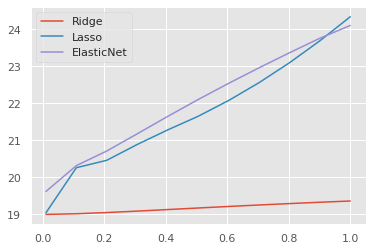

In [42]:
#declarando um dicionário de modelos
models=dict()
models["Ridge"] = Ridge()
models["Lasso"] = Lasso()
models["ElasticNet"] = ElasticNet()
#models["LassoLars"] = LassoLars()

#uma lista com 10 valores alpha entre (0.01 e 1)
alphas =  np.linspace(0.01,1,11)

#iterando dentro dos modelos e valores de alpha
for name, model in models.items():
  mse=list()
  for alpha in alphas:

    #configurado o parâmetro alpha
    model.set_params(**{'alpha': alpha})

    #treinando o model
    model.fit(X_train, y_train)

    #salvando o resultado do mse
    mse.append(mean_squared_error(y_test, model.predict(X_test)))

  plt.plot(alphas, mse, label='%s' % name)

plt.legend()
plt.show()



---



---



### Regressao stepwise (seleção de variáveis)





Perceba que ao zerar o coeficiente de uma feature, temos o mesmo efeito de eliminar a coluna referente da matriz de features (X). Na regressão stepwise, adicionamos ou retiramos features iterativamente de maneira [gulosa](https://en.wikipedia.org/wiki/Greedy_algorithm), a fim de encontrar uma combinação de colunas sub-ótima.

> **Least Angle Regression**


Em cada etapa, ele encontra a feature mais correlacionada ao target, ou ao resíduo do target. Em caso de haver mais de uma ele segue uma direção equiangular entre essas features.


>> **Vantagens**:

- Computacionamente eficiente
- Robusto a multicolineariedade e alta dimensionalidade
- Pode ser combinado a outros algoritmos (ex. LARSLasso)



>> **Desvantagens:**

- Por usar uma solução gulosa, na maioria dos casos teremos **resultados sub-ótimos**.
- Como o modelo refaz o **ajuste** usando os **resíduos**, o **erro** pode **extrapolar** na presença de **ruído**.


In [43]:
from sklearn.linear_model import Lars

train_linear_model(Lars(),  X_train.values, X_test.values,  y_train.values, y_test.values)

Model Name:  Lars()
MSE: 21.245
Bias: 18.523
Variance: 2.721
R2: 0.757
---------------------
Intercept: 44.091
Coeficientes: [ -0.038   0.055   0.173   3.407 -24.533   3.376   0.004  -1.549   0.513
  -0.022  -1.046   0.014  -0.593]


> Outras Maneiras

- Orthogonal Matching Pursuit ([OMP](https://scikit-learn.org/stable/modules/linear_model.html#orthogonal-matching-pursuit-omp))
- Recursive Feature Elimination ([RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html))





---



---





### Regressão Robusta

> **RANSAC (RANdom SAmple Consensus)**

O algoritmo divide os dados completos da amostra de entrada em um conjunto de "inliners", e ajusta um modelo para um subconjunto dessas amostras repetidas vezes. Esse modelo pode ser usado em problemas não lineares.


![picture](https://scikit-learn.org/stable/_images/sphx_glr_plot_ransac_0011.png)

In [44]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor()

#calculando o bias e a variância
bias_variance(model, X_train.values, X_test.values,  y_train.values, y_test.values) 

#treinando e avaliando o modelo (R^2)
ransac.fit(X_train, y_train)
print("R2: {:.3f}".format(ransac.score(X_test, y_test)))

Model Name:  ElasticNet
MSE: 24.577
Bias: 23.350
Variance: 1.227
R2: -0.722




---



> **Variáveis polinomiais**

Agora vamos treinar os nossos modelos novamente, **transformando** a matriz de features (X), em uma **função polinomial** de grau 2. 

In [45]:
#transformando a matriz de features em uma funcao polinomial
X_train_poly, X_test_poly = create_polynomial_regression_model(2, get_data=True)

models=dict()

models["LinearRegression"] = LinearRegression()
models["Ridge"] = Ridge(alpha=0.8)

#Os modelos abaixo não convegem
#models["Lasso"] = Lasso()
#models["ElasticNet"] = ElasticNet()
#models["Lars"] = Lars()



for model in models.values():
  print("\n####################################")
  train_linear_model(model, X_train_poly, X_test_poly,  y_train.values, y_test.values, print_coef=False)


####################################
Model Name:  LinearRegr
MSE: 637.465
Bias: 100.243
Variance: 537.221
R2: 0.552

####################################
Model Name:  Ridge(alph
MSE: 113.443
Bias: 55.138
Variance: 58.306
R2: 0.651




---



---



> Outros Modelos Lineares

- [SVM](https://scikit-learn.org/stable/modules/svm.html#regression)
- [Bayesian Regressor](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression)
- [Generalized Linear Regression](https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-regression)


> Critérios para escolher modelos lineares pela [documentação](https://scikit-learn.org/stable/modules/linear_model.html) do sklearn (são 17 modelos).

- Dimensionalidade
- Multicolineariedade
- Esparsidade
- Número de registros
- Nivel de ruido
- Presença de Outliers
- Outros...



---



---



## Modelos de regressao não linear

Voce pode encontrar uma explicação mais extensa sobre modelos de árvores na [apostila](https://github.com/nicholasrichers/regressao-neuron/blob/master/apostila_neuron.pdf) da neuron.

![picture](https://miro.medium.com/max/1336/0*Mr6cB6yeOTZWFnFs.png)

Observe como um **ensemble de árvores** cria um ajuste muito mais adequado para o relacionamento dessas 2 variáveis. Mas é necessário ter atenção com o **overfitting**.

![picture](https://miro.medium.com/max/691/1*Edq1ZIOo26Iqp3CuUTWotA.png)

> Apesar da natureza do **modelo** ser totalmente **diferente**, a forma de fazer o **ajuste** com o sklearn é **idêntica** aos modelos lineares.

In [65]:
%%time
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor(n_estimators=20) #O padrao é 100

#calculando o bias e a variância
bias_variance(reg_rf, X_train.values, X_test.values,  y_train.values, y_test.values) 

#treinando e avaliando o modelo (R^2)
reg_rf.fit(X_train, y_train)
print("R2: {:.3f}".format(reg_rf.score(X_test, y_test)))

Model Name:  RandomFore
MSE: 13.272
Bias: 10.905
Variance: 2.367
R2: 0.859
CPU times: user 27.9 s, sys: 50.4 ms, total: 27.9 s
Wall time: 28 s


**Obs: Perceba que para ambas as métricas MSE e R2, tivemos um resultado muito superior aos modelos lineares.**

> **Outros modelos não lineares**

- K-Nearest Neighbors
- Redes Neurais



---



---



# Comparacao de modelos com Auto ML

> **Student Dataset**

Agora iremos usar um dataset diferente, precisamos **prever a nota** final de um estudante em **matemática**, baseado em dados socioeconômicos.

[Link UCI](https://archive.ics.uci.edu/ml/datasets/student+performance)

[Descrição](https://github.com/nicholasrichers/regressao-neuron/blob/master/student_dataset/student.txt)

In [47]:
#student
import pandas as pd
dados_url = 'https://raw.githubusercontent.com/nicholasrichers/regressao-neuron/master/student_dataset/student-mat.csv'

data = pd.read_csv(dados_url, sep=";")

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Retiramos a nota das 3 provas anteriores para não ficar muito fácil.

In [48]:
#criei a coluna média das notas
data["media"] = (data["G1"] + data["G2"] + data["G3"])/3

#deletando as outras notas
data.drop(columns=["G1","G2","G3"], inplace=True)

data.shape

(395, 31)



---



---



> **Pycaret**

Pycaret é uma excelente **ferramenta** para usar em **conjunto** com o **sklearn**, esse [post](https://towardsdatascience.com/announcing-pycaret-2-0-39c11014540e) é uma otima introdução a essa biblioteca.

In [49]:
from pycaret.regression import *

#lista dos modelos disponiveis
#models()

In [50]:
%%time
# init setup
reg2 = setup(df, target = 'medv') 

# validação cruzada 5-fold
best_specific = compare_models(fold=3, n_select = 5, blacklist = ['tr']) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,2.2065,10.8148,3.2439,0.8745,0.1466,0.1121,0.2563
1,CatBoost Regressor,2.2393,11.2635,3.2897,0.8708,0.1476,0.1141,1.9589
2,Gradient Boosting Regressor,2.3660,11.9517,3.3990,0.8624,0.1540,0.1212,0.0925
3,Extreme Gradient Boosting,2.4253,13.0154,3.5676,0.8489,0.1591,0.1241,0.0689
4,Random Forest,2.4274,13.2734,3.5439,0.8484,0.1596,0.1251,0.3497
5,Light Gradient Boosting Machine,2.6442,15.1910,3.8619,0.8230,0.1652,0.1312,0.0357
6,AdaBoost Regressor,2.8250,16.8540,4.0222,0.8067,0.1819,0.1494,0.0949
7,Bayesian Ridge,3.3968,23.1803,4.7888,0.7259,0.2657,0.1780,0.0074
8,Ridge Regression,3.4150,23.1199,4.7903,0.7252,0.2687,0.1793,0.0059
9,Linear Regression,3.4577,23.1751,4.7999,0.7229,0.2518,0.1802,0.0071


CPU times: user 1min 10s, sys: 4.48 s, total: 1min 14s
Wall time: 23min 47s


In [51]:
%%time
# init setup
reg1 = setup(data, target = 'media') 

# validação cruzada 3-fold
best_specific = compare_models(fold=3, n_select = 5, blacklist = ['tr']) 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Bayesian Ridge,2.4788,9.6088,3.0888,0.2463,0.3257,0.3374,0.0149
1,CatBoost Regressor,2.5007,9.6998,3.1040,0.2347,0.3226,0.3331,1.9354
2,Random Forest,2.4861,9.7655,3.1093,0.2250,0.3105,0.3134,0.3496
3,AdaBoost Regressor,2.5713,10.4050,3.2164,0.1792,0.3251,0.3350,0.1016
4,Gradient Boosting Regressor,2.6184,10.4508,3.2180,0.1712,0.3228,0.3335,0.0894
5,Extreme Gradient Boosting,2.6510,10.7044,3.2639,0.1508,0.3282,0.3349,0.0594
6,Light Gradient Boosting Machine,2.6882,11.1054,3.3229,0.1219,0.3354,0.3445,0.0311
7,Orthogonal Matching Pursuit,2.6573,11.1701,3.3293,0.1155,0.3397,0.3426,0.0068
8,Support Vector Machine,2.7879,11.8433,3.4329,0.0677,0.3564,0.3855,0.0128
9,Ridge Regression,2.8295,12.4327,3.5205,0.0046,0.3833,0.3572,0.0096


CPU times: user 59.8 s, sys: 9.43 s, total: 1min 9s
Wall time: 5min 43s


In [52]:
best_specific[1]

In [53]:
type(best_specific[1])

catboost.core.CatBoostRegressor



---



---



> **H2O**

Agora se voce quer usar apenas uma ferramenta, o H2O é a ferramenta certa pra você. [Artigo Neuron](https://medium.com/@nicholasrichers/crie-modelos-de-machine-learning-em-menos-de-10-minutos-com-automl-d4ecf67fab02) sobre o H2O.

In [54]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmppr7_oder
  JVM stdout: /tmp/tmppr7_oder/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmppr7_oder/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.2
H2O_cluster_version_age:,6 days
H2O_cluster_name:,H2O_from_python_unknownUser_ezqbo2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [55]:
dados_url = 'https://raw.githubusercontent.com/nicholasrichers/regressao-neuron/master/student_dataset/student-mat.csv'

data = h2o.import_file(dados_url)
data["media"] = (data["G1"] + data["G2"] + data["G3"])/3

type(data)

Parse progress: |█████████████████████████████████████████████████████████| 100%


h2o.frame.H2OFrame

In [56]:
data.describe()

Rows:395
Cols:34




,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,media
type,enum,enum,int,enum,enum,enum,int,int,enum,enum,enum,enum,int,int,int,enum,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,int,int,int,int,int,int,real
mins,,,15.0,,,,0.0,0.0,,,,,1.0,1.0,0.0,,,,,,,,,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.3333333333333333
mean,,,16.69620253164557,,,,2.749367088607595,2.5215189873417736,,,,,1.4481012658227845,2.0354430379746833,0.3341772151898734,,,,,,,,,3.9443037974683564,3.235443037974683,3.1088607594936697,1.4810126582278482,2.291139240506329,3.5544303797468384,5.708860759493671,10.908860759493665,10.71392405063291,10.41518987341772,10.679324894514771
maxs,,,22.0,,,,4.0,4.0,,,,,4.0,4.0,3.0,,,,,,,,,5.0,5.0,5.0,5.0,5.0,5.0,75.0,19.0,19.0,20.0,19.333333333333332
sigma,,,1.2760427246056265,,,,1.0947351414285371,1.0882005458269433,,,,,0.6975047549086822,0.8392403464185556,0.7436509736062509,,,,,,,,,0.8966586076885046,0.9988620396657203,1.1132781740183422,0.8907414280909669,1.2878965924510932,1.3903033913095773,8.003095687108184,3.3191946715076686,3.7615046595560306,4.5814426109978434,3.6967856336770732
zeros,,,0,,,,3,2,,,,,0,0,312,,,,,,,,,0,0,0,0,0,0,115,0,13,38,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0,5.666666666666667
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0,5.333333333333333
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0,8.333333333333334




---



---



> Auto-ML

Na [documentação](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html), você encontrará que o AutoML só trabalha com algoritmos "top de linha", e a verdade é que você **não precisa se preocupar por enquanto**, como esses modelos funcionam a fundo.

1. Random Forest (**DRF**)
2. Extremely-Randomized Forest (**DRF/XRT**)
3. Generalized Linear Models (**GLM**)
4. XGBoost (**XGBoost**)
5. Gradient Boosting Machines (**GBM**)
6. Deep Neural Nets (**DeepLearning**)
7. **Stacked Ensembles**: One of all the models
8. **Stacked Ensembles**: Only the best models of each kind

In [57]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models = 10, #default = 10
                max_runtime_secs=300, #default = inf
                nfolds=3, #default = 5
                sort_metric = "MSE", #default = logloss
                seed = 1,  
                )

In [58]:
%%time
aml.train(x = data.columns[:-4],
          y = "media", 
          training_frame = data
          )

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 5.06 s, sys: 84.8 ms, total: 5.15 s
Wall time: 25.5 s


In [59]:
h2o.automl.get_leaderboard(aml, extra_columns = 'training_time_ms').head(20)

model_id,mse,mean_residual_deviance,rmse,mae,rmsle,training_time_ms
StackedEnsemble_AllModels_AutoML_20200910_174106,10.4353,10.4353,3.23038,2.57978,0.329602,159
StackedEnsemble_BestOfFamily_AutoML_20200910_174106,10.6156,10.6156,3.25816,2.60691,0.334196,157
GBM_3_AutoML_20200910_174106,10.7851,10.7851,3.28407,2.60662,0.335052,270
GBM_1_AutoML_20200910_174106,10.8332,10.8332,3.29138,2.62379,0.332777,286
GBM_2_AutoML_20200910_174106,10.9949,10.9949,3.31586,2.64367,0.336992,202
GBM_4_AutoML_20200910_174106,11.1992,11.1992,3.34653,2.67373,0.340372,244
GLM_1_AutoML_20200910_174106,11.345,11.345,3.36824,2.70787,0.350316,604
DRF_1_AutoML_20200910_174106,11.7405,11.7405,3.42644,2.69624,0.349958,964
XGBoost_3_AutoML_20200910_174106,12.1397,12.1397,3.48421,2.75095,0.349294,196
XGBoost_2_AutoML_20200910_174106,12.6447,12.6447,3.55594,2.81817,0.353158,266




---



---



> **Análise do Modelo**

Uma vez que temos um modelo em mãos, podemos inclusive analisar mais a fundo suas previsões. Contudo o H2O gera **muitas informações** que **não são relevantes** para o problema em questão, então é importante saber os **conceitos** para interpretar a saída do modelo,

In [62]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

# Get the "All Models" Stacked Ensemble model
best = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [63]:
best

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20200910_174106


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,35.0,35.0,12043.0,6.0,8.0,7.857143,16.0,27.0,22.657143




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 3.413465111410485
RMSE: 1.8475565245508687
MAE: 1.442045612274846
RMSLE: 0.20603269971570312
Mean Residual Deviance: 3.413465111410485

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 10.78510894040408
RMSE: 3.28406896096962
MAE: 2.606623117520652
RMSLE: 0.33505156363602795
Mean Residual Deviance: 10.78510894040408

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid
0,mae,2.6074302,0.29011363,2.3589587,2.5370836,2.9262486
1,mean_residual_deviance,10.790509,1.8730675,9.414536,10.033363,12.923628
2,mse,10.790509,1.8730675,9.414536,10.033363,12.923628
3,r2,0.18595187,0.11423549,0.22865084,0.056517497,0.2726873
4,residual_deviance,10.790509,1.8730675,9.414536,10.033363,12.923628
5,rmse,3.2769349,0.2798386,3.0683117,3.1675487,3.5949447
6,rmsle,0.3337142,0.03817037,0.31197146,0.3113829,0.37778825



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2020-09-10 17:41:24,1.045 sec,0.0,3.692103,2.976724,13.631626
1,,2020-09-10 17:41:24,1.109 sec,5.0,3.142526,2.529426,9.875467
2,,2020-09-10 17:41:24,1.157 sec,10.0,2.790839,2.220518,7.788783
3,,2020-09-10 17:41:24,1.189 sec,15.0,2.522070,1.998790,6.360839
4,,2020-09-10 17:41:24,1.220 sec,20.0,2.319601,1.821219,5.380547
5,,2020-09-10 17:41:24,1.251 sec,25.0,2.125254,1.676960,4.516706
6,,2020-09-10 17:41:24,1.281 sec,30.0,1.972775,1.542002,3.891840
7,,2020-09-10 17:41:24,1.309 sec,35.0,1.847557,1.442046,3.413465



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,failures,3256.416992,1.000000,0.155050
1,absences,2380.743896,0.731093,0.113356
2,Mjob,1893.763672,0.581548,0.090169
3,freetime,1101.111572,0.338136,0.052428
4,reason,1078.468262,0.331182,0.051350
5,health,1059.400879,0.325327,0.050442
6,Fjob,1032.905640,0.317191,0.049181
7,goout,988.109009,0.303434,0.047048
8,Walc,838.058899,0.257356,0.039903
9,Medu,739.664917,0.227141,0.035218



See the whole table with table.as_data_frame()




---



---

